<a href="https://colab.research.google.com/github/21700185-kimtaehong/Int_AI_sample/blob/main/03_28_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#x_train.shape
# type(x_train[0,0,0])

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
n = 1
plt.imshow(x_train[n], cmap='Greys', interpolation='nearest')
plt.show()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_train.shape
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#input_shape

In [4]:
y_train[0:10]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [5]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [7]:
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [8]:
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
batch_size = 128
epochs = 12

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 17s 7ms/step - loss: 0.8894 - accuracy: 0.9251 - val_loss: 0.0534 - val_accuracy: 0.9824
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0878 - accuracy: 0.9733 - val_loss: 0.0445 - val_accuracy: 0.9860
Epoch 3/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0653 - accuracy: 0.9797 - val_loss: 0.0355 - val_accuracy: 0.9884
Epoch 4/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0561 - accuracy: 0.9829 - val_loss: 0.0401 - val_accuracy: 0.9886
Epoch 5/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 6/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0474 - accuracy: 0.9849 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 7/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch

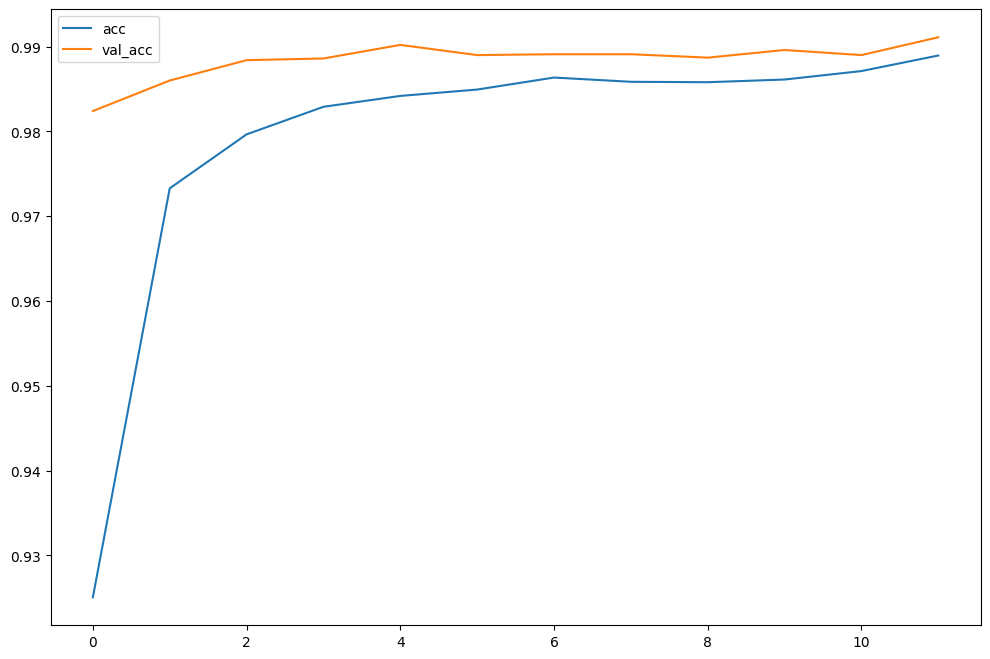

In [10]:
plt.figure(figsize=(12,8))
#plt.plot(hist.history['loss’])
#plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.legend(['loss','val_loss', 'acc','val_acc’])
plt.legend(['acc','val_acc'])
plt.show()

313/313 [==============================] - 1s 3ms/step


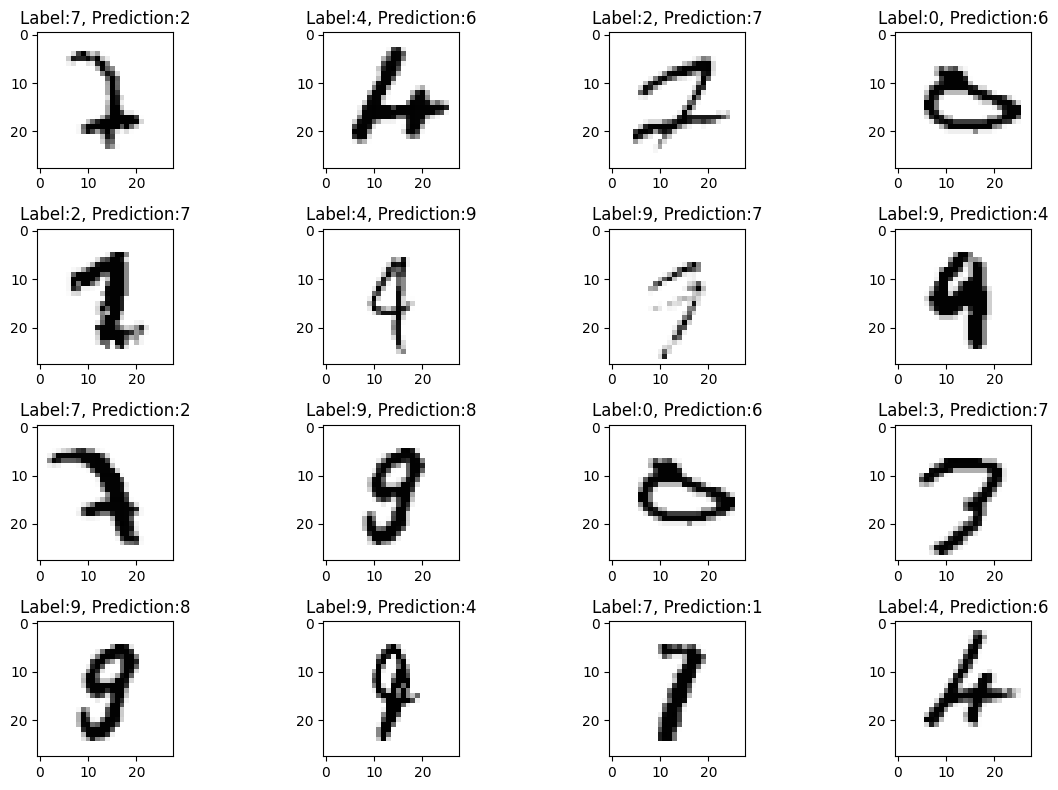

In [12]:
import random
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)
wrong_result = []
for n in range(0, len(test_labels)):
  if predicted_labels[n] != test_labels[n]:
    wrong_result.append(n)
samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))
for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)
plt.tight_layout()
plt.show()